# (Prosper Loan Data)
## by (Passant Hamdi)

## Investigation Overview

> In this investigation, i wanted to highlight the main factors that affect the borrower's annual percentage rate(APR) for the loan.

## Dataset Overview

> The data consists of 105462 loans with 39 features after removing some of the duplicated data and the variables with alot of missing values, i tried to focus on some of those features that i thought would affect APR most.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#Removing duplicate values from columns ListingKey, LoanKey and MemberKey
df.drop_duplicates(subset=['ListingKey'],inplace=True)
df.drop_duplicates(subset=['LoanKey'],inplace=True)

In [4]:
# Now we are going to drop 44 columns.
df.drop(['ListingKey', 'ListingNumber', 'CreditGrade', 'ClosedDate', 'EstimatedEffectiveYield', 'EstimatedLoss', 
         'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState',
         'Occupation', 'EmploymentStatusDuration', 'GroupKey', 'CreditScoreRangeLower','CreditScoreRangeUpper', 
         'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
         'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 
         'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 
         'TradesOpenedLast6Months', 'DebtToIncomeRatio','LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
         'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
         'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
         'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'MemberKey'], axis=1,  inplace=True)

In [5]:
# Drop null values.
df.dropna(inplace=True)

In [6]:
# Changing 'ListingCreationDate' and 'LoanOriginationDate' to datetime.
df['ListingCreationDate']= pd.to_datetime(df['ListingCreationDate'])
df['LoanOriginationDate']= pd.to_datetime(df['LoanOriginationDate'])

In [7]:
# Extracting year from 'ListingCreationDate' and 'LoanOriginationDate' to use it in our analysis.
df['ListingCreationyear'] = df['ListingCreationDate'].dt.year
df['LoanOriginationyear'] = df['LoanOriginationDate'].dt.year

In [8]:
# First we will change the column name to remove '(numeric)'
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [9]:
# Then replace each number with its category.
df['ListingCategory'].replace({0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 
                             4: 'Personal Loan', 5: 'Student Use', 6: 'Auto',7: 'Other', 8: 'Baby&Adoption', 
                             9: 'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
                             13: 'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 
                             17: 'RV', 18: 'Taxes', 19:'Vacation', 20:'Wedding Loans'}, inplace=True)

## Borrower APR Distibution

> Borrower APR varies from 0.08 to 0.4 %, the distribution takes on multimodal shape with the highest peak at 0.2%.

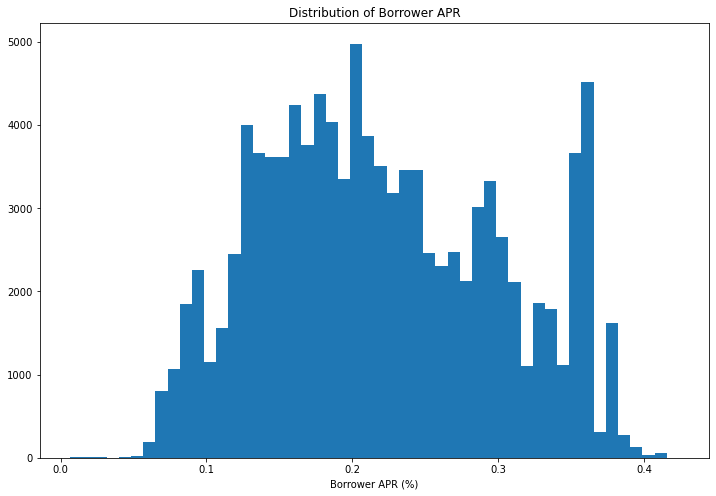

In [10]:
plt.figure(figsize=[12, 8])
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR (%)')
plt.hist(x = 'BorrowerAPR', data = df, bins = 50);

## Loan Status Vs. Borrower APR

> Plotting loan status vs borrower APR shows that completed and current loans have the lowest average of APR.

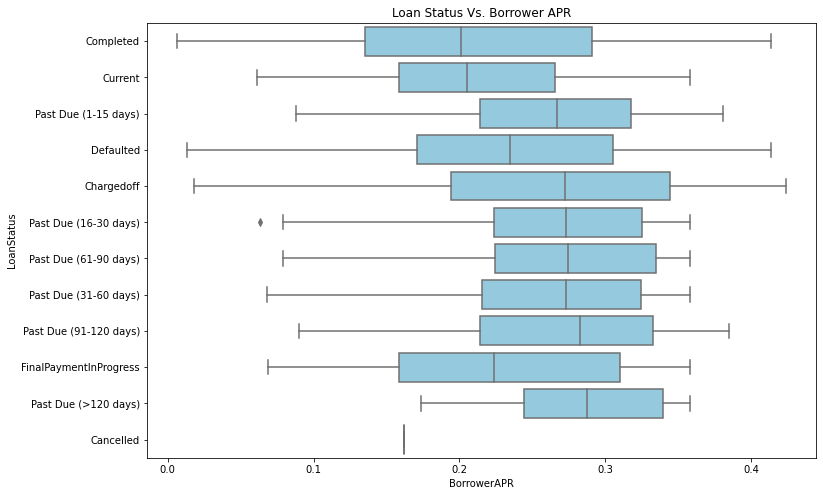

In [11]:
plt.figure(figsize=[12, 8])
plt.title('Loan Status Vs. Borrower APR')
sns.boxplot(y = 'LoanStatus', x = 'BorrowerAPR', data = df, color = 'skyblue');

## The interaction between loan original amount, investors and borrower APR

Plotting the loan original amount and investors shows that the number of investors icrease at larger loan amounts, adding the borrower APR showing lower APR values with high loan amount and high investors number.

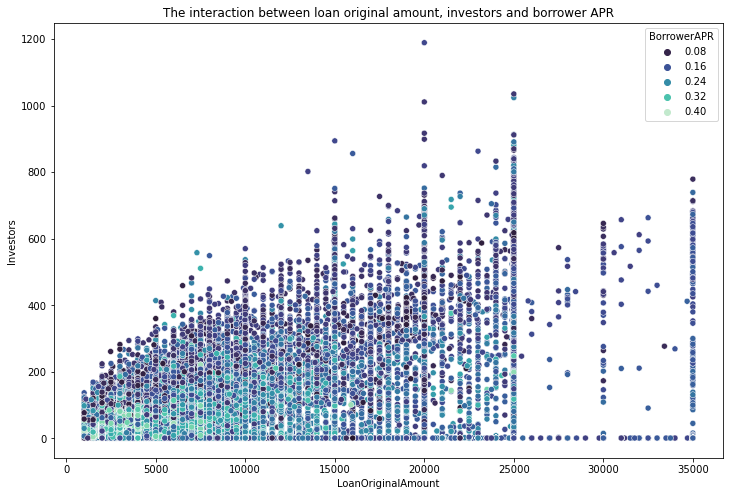

In [12]:
plt.figure(figsize=[12, 8])
plt.title('The interaction between loan original amount, investors and borrower APR')
sns.scatterplot(x = 'LoanOriginalAmount', y = 'Investors', hue = 'BorrowerAPR' , data = df, palette = 'mako');

## Effect of Loan Term on the Borrower APR over the years

> Plotting the effect of loan term on the borrower APR over the years shows that the lowest APR values were mostly with the loan highest term of 60 months.

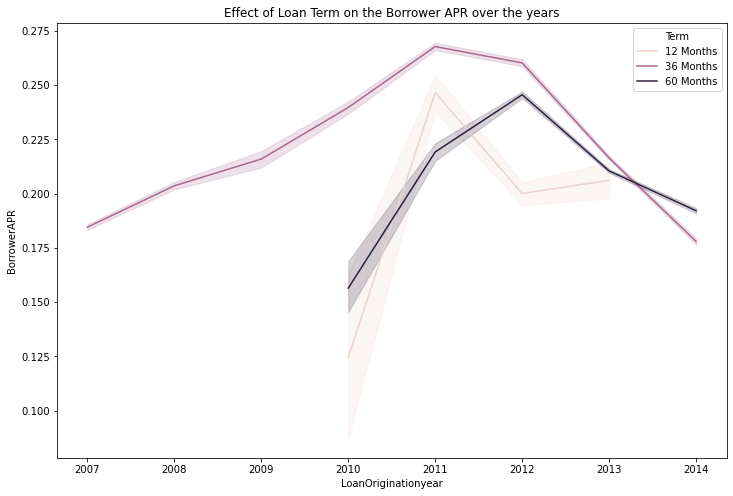

In [13]:
plt.figure(figsize=[12, 8])
plt.title('Effect of Loan Term on the Borrower APR over the years')
sns.lineplot(x = 'LoanOriginationyear', y = 'BorrowerAPR', data = df , hue = 'Term' , legend = False);
plt.legend(title='Term', labels=['12 Months', '36 Months', '60 Months']);

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle